In [1]:
import pandas as pd
temp_rain_soil = pd.read_csv("../../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08_15mins.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:15:00,14,0.0,37.364,10.4
2018-07-07 11:30:00,14,0.0,37.594,10.4
2018-07-07 11:45:00,14,0.0,37.590,10.4
2018-07-07 12:00:00,15,0.0,37.587,10.5
2018-07-07 12:15:00,15,0.0,37.584,10.5


In [2]:
temp_rain_soil.tail()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2023-08-23 03:00:00,11,0.0,50.822,11.7
2023-08-23 03:15:00,11,0.0,50.825,11.7
2023-08-23 03:30:00,11,0.0,50.822,11.6
2023-08-23 03:45:00,11,0.0,50.951,11.6
2023-08-23 04:00:00,10,0.0,50.954,11.6


In [3]:
temp_rain_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179780 entries, 2018-07-07 11:15:00 to 2023-08-23 04:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Temp       179780 non-null  int64  
 1   Rain(mm)   179780 non-null  float64
 2   SoilMoist  179780 non-null  float64
 3   SoilTemp   179780 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 6.9 MB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(temp_rain_soil['Temp'], label='Temperature')
plt.plot(temp_rain_soil['Rain(mm)'], label='Rainfall (mm)')
plt.plot(temp_rain_soil['SoilMoist'], label='Soil Moisture')
plt.plot(temp_rain_soil['SoilTemp'], label='Soil Temperature')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Use seasonal decomposition to separate the time series into trend, seasonal, and residual components.

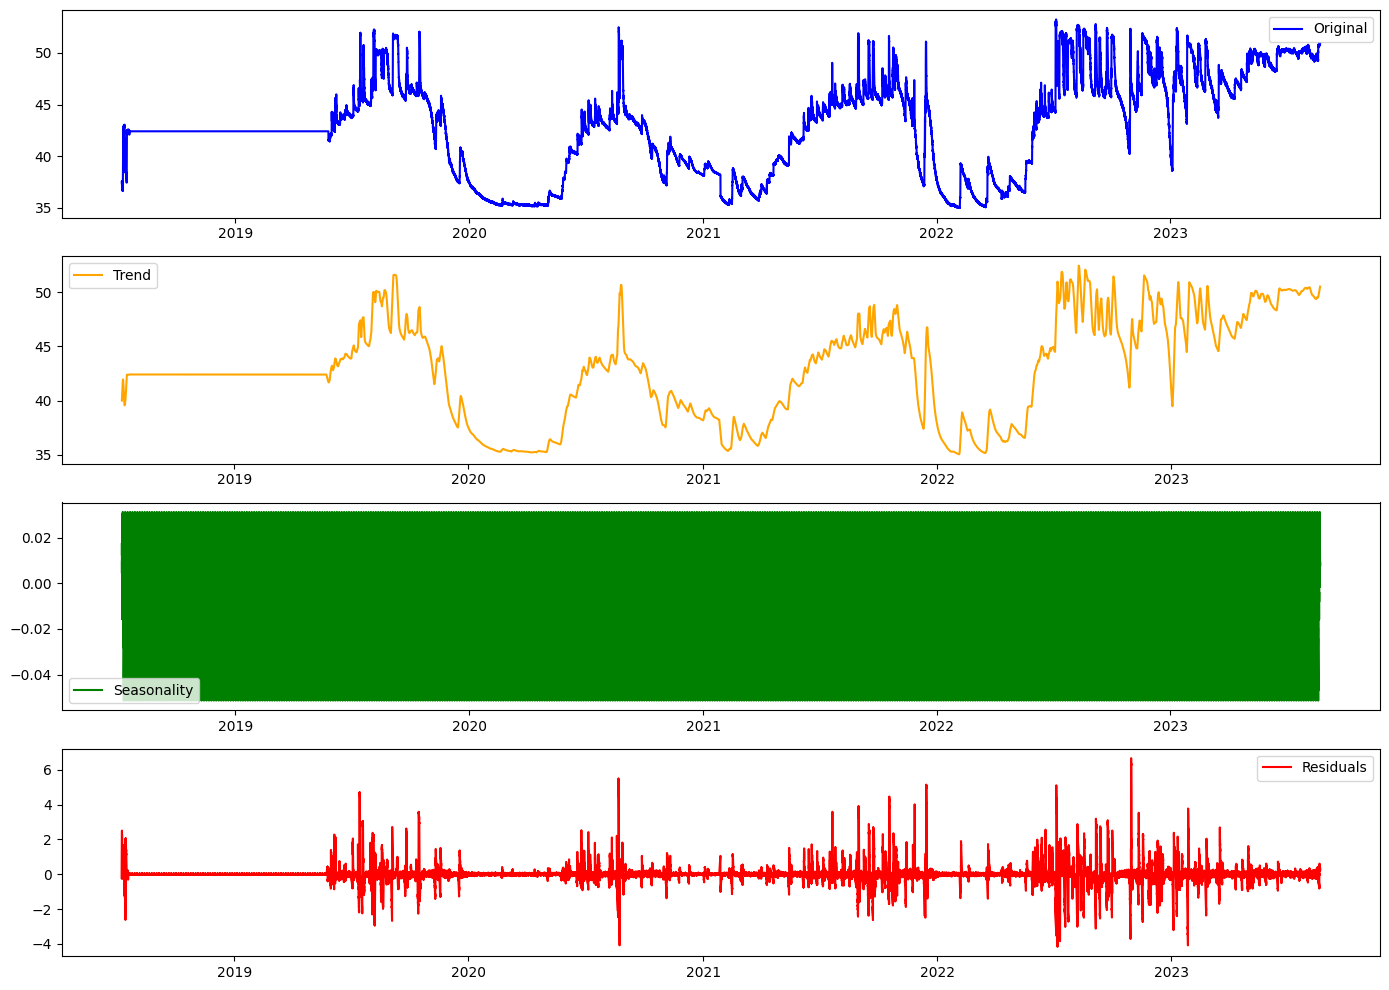

In [4]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data for soil moisture
decomposition = seasonal_decompose(temp_rain_soil['SoilMoist'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(temp_rain_soil['SoilMoist'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


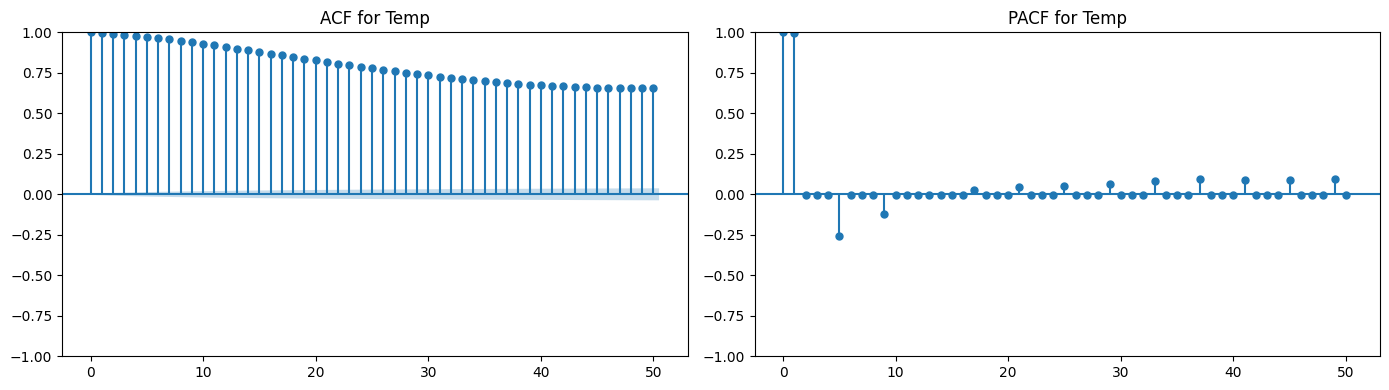

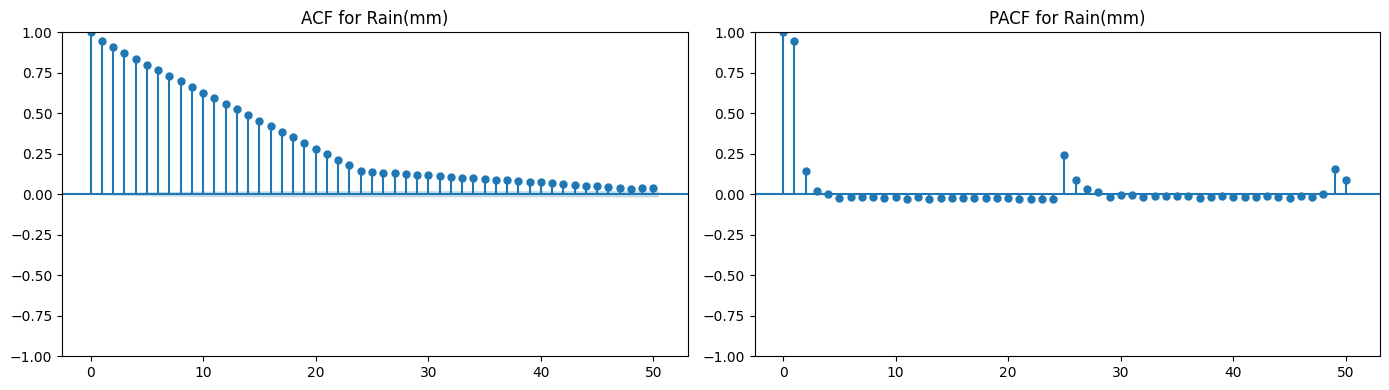

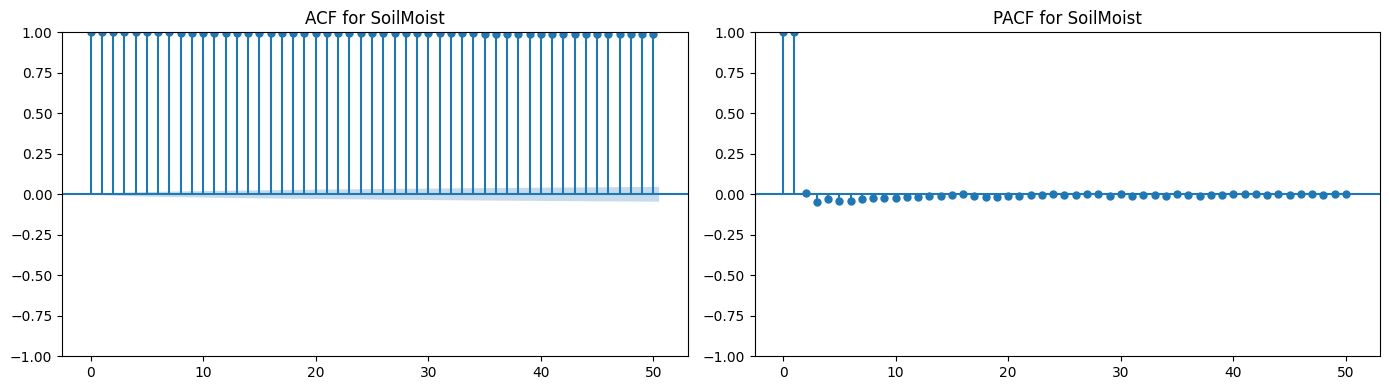

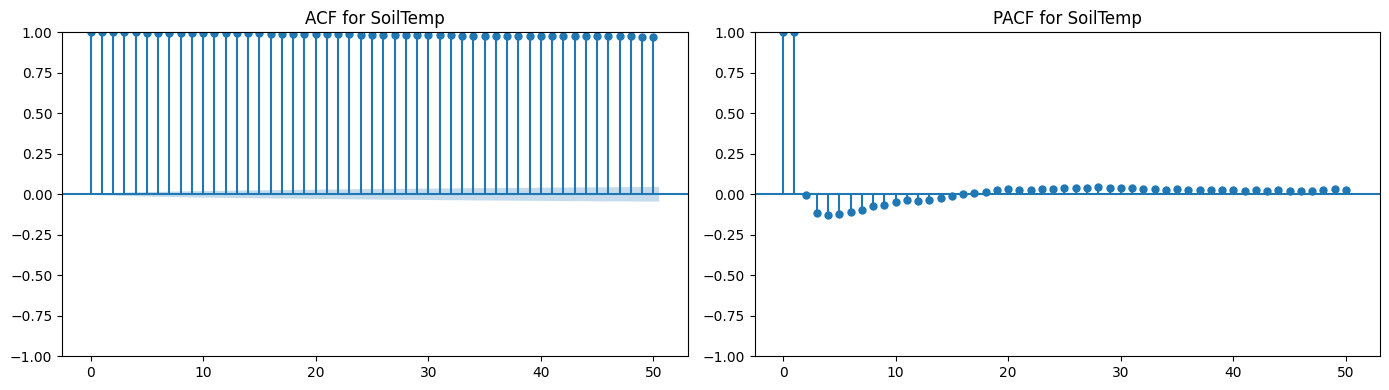

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

variables = ['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp']

# Plot ACF and PACF for each variable
for var in variables:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(temp_rain_soil[var], lags=50, ax=ax1, title=f'ACF for {var}')
    plot_pacf(temp_rain_soil[var], lags=50, ax=ax2, title=f'PACF for {var}')
    plt.tight_layout()
    plt.show()

In [6]:
from statsmodels.tsa.stattools import acf, pacf

lags = 50
for column in temp_rain_soil.columns.difference(['Year', 'Month']):
    # Calculate ACF and PACF
    acf_values = acf(temp_rain_soil[column], nlags=lags)
    pacf_values = pacf(temp_rain_soil[column], nlags=lags)
    
    
    # Print the first few ACF and PACF values
    print(f"ACF values for {column}:")
    print(acf_values[:10])
    print(f"\nPACF values for {column}:")
    print(pacf_values[:10])
    print("\n------------------------------------------\n")

ACF values for Rain(mm):
[1.         0.94456647 0.90746588 0.87146419 0.83690212 0.8013585
 0.76626654 0.7314874  0.69692798 0.66214975]

PACF values for Rain(mm):
[ 1.          0.94457173  0.14158124  0.01826295  0.00238568 -0.02196381
 -0.01670088 -0.01588431 -0.01693434 -0.02132215]

------------------------------------------

ACF values for SoilMoist:
[1.         0.9998805  0.99976326 0.99963421 0.99949775 0.9993508
 0.99919362 0.99902878 0.99885753 0.99867881]

PACF values for SoilMoist:
[ 1.          0.99988606  0.00985276 -0.05180677 -0.03368592 -0.04427567
 -0.04286446 -0.02938625 -0.02209355 -0.02600973]

------------------------------------------

ACF values for SoilTemp:
[1.         0.99982112 0.99964012 0.99941714 0.99914866 0.99883245
 0.99847012 0.99806273 0.99761434 0.99712463]

PACF values for SoilTemp:
[ 1.          0.99982668 -0.00621479 -0.12119972 -0.1319197  -0.12792205
 -0.11168485 -0.09665654 -0.07444144 -0.06638273]

------------------------------------------

A

Rain(mm):

ACF shows significant autocorrelation at the first lag, indicating that rainfall tends to be correlated with itself at one-hour intervals.
PACF shows a significant value at the first lag, suggesting that the previous hour's rainfall has a direct impact on the current hour's rainfall.
SoilMoist:

Both ACF and PACF show very high values for the first few lags, indicating strong autocorrelation and partial autocorrelation. This suggests that soil moisture values are highly persistent and influenced by their immediate past values.
SoilTemp:

Similar to SoilMoist, SoilTemp also shows strong autocorrelation and partial autocorrelation, indicating persistence and influence from past values.

# Check for Stationarity and Determine d (Order of Differencing):

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(temp_rain_soil['Rain(mm)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -30.107611380048684
p-value: 0.0
Critical Values:
	1%: -3.430386390614433
	5%: -2.86155608416006
	10%: -2.5667785610218785


The Dickey-Fuller test results indicate that the series Rain(mm) is stationary. 
The ADF statistic is significantly lower than the critical values at the 1%, 5%, and 10% levels, and the p-value is very low (close to zero). 

This suggests strong evidence against the null hypothesis, indicating that the series is indeed stationary.

# Arima Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

train_data_rain, test_data_rain = train_test_split(temp_rain_soil['Rain(mm)'], test_size=0.3, shuffle=False)
model_rain = ARIMA(train_data_rain, order=(1, 0, 0))
model_fit_rain = model_rain.fit()

# Print AIC and BIC for Rain(mm)
print("AIC for Rain(mm):", model_fit_rain.aic)
print("BIC for Rain(mm):", model_fit_rain.bic)

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


AIC for Rain(mm): -359354.6654993356
BIC for Rain(mm): -359325.4370566871


In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

forecast_steps = len(test_data_rain)
prediction = model_fit_rain.forecast(steps=forecast_steps)

rmse = sqrt(mean_squared_error(test_data_rain, prediction))
print(f"RMSE: {rmse}")

RMSE: 0.6605346286623799


In [11]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(temp_rain_soil['SoilMoist'], test_size=0.3, shuffle=False)
# print(f"Train data length: {len(train_data)}")
# print(f"Test data length: {len(test_data)}")

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


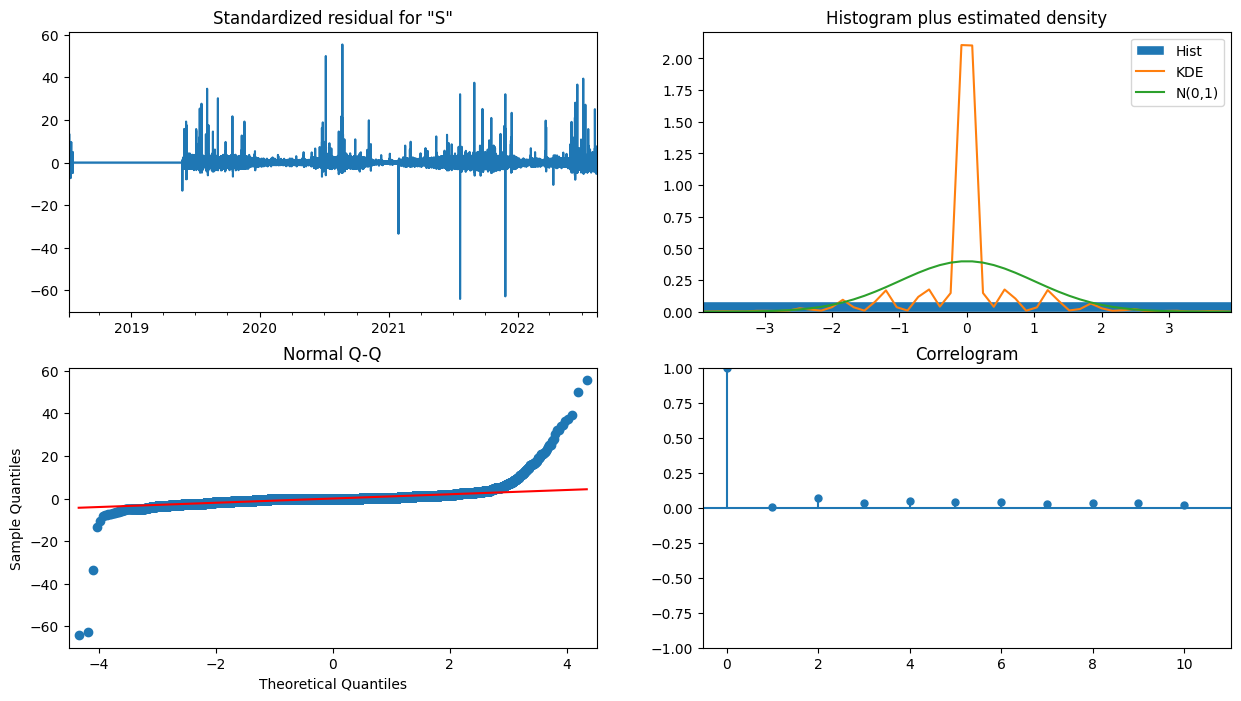

AIC for SoilMoist: -390082.80174450565
BIC for SoilMoist: -390053.1727076792


In [12]:
from sklearn.model_selection import train_test_split
train_data_soil_moist, test_data_soil_moist = train_test_split(temp_rain_soil['SoilMoist'], test_size=0.2, shuffle=False)

model_soil_moist = ARIMA(train_data_soil_moist, order=(1, 0, 0))
model_fit_soil_moist = model_soil_moist.fit()

model_fit_soil_moist.plot_diagnostics(figsize=(15,8))
plt.show()

print("AIC for SoilMoist:", model_fit_soil_moist.aic)
print("BIC for SoilMoist:", model_fit_soil_moist.bic)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

forecast_steps = len(test_data_soil_moist)
prediction = model_fit_soil_moist.forecast(steps=forecast_steps)

rmse = sqrt(mean_squared_error(test_data_soil_moist, prediction))
print(f"RMSE: {rmse}")


RMSE: 5.573150951330078


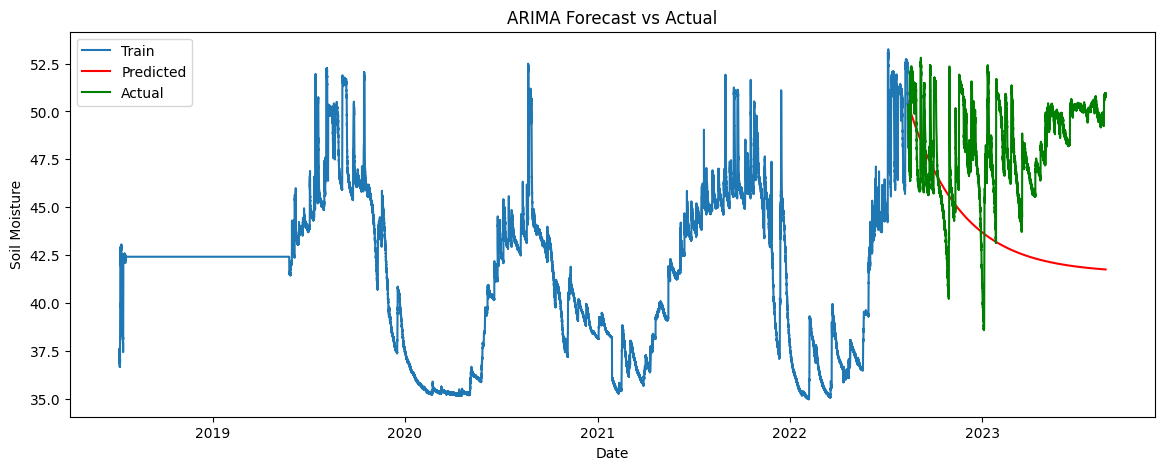

In [14]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(train_data_soil_moist, label='Train')
plt.plot(test_data_soil_moist.index, prediction, color='red', label='Predicted')
plt.plot(test_data_soil_moist, color='green', label='Actual')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Soil Moisture')
plt.legend()
plt.show()

# explore other orders selection using grid search

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-367474.496, Time=330.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-320201.466, Time=28.96 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-343368.405, Time=34.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-364012.016, Time=87.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-320203.466, Time=12.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-368722.825, Time=348.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-366689.299, Time=169.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-367299.941, Time=249.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-367050.707, Time=221.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-367399.148, Time=205.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-367875.078, Time=232.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-366452.743, Time=172.92 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-368758.255, Time=127.61 sec
 ARIMA(0,1,2)(0,0,0)[0]             : 

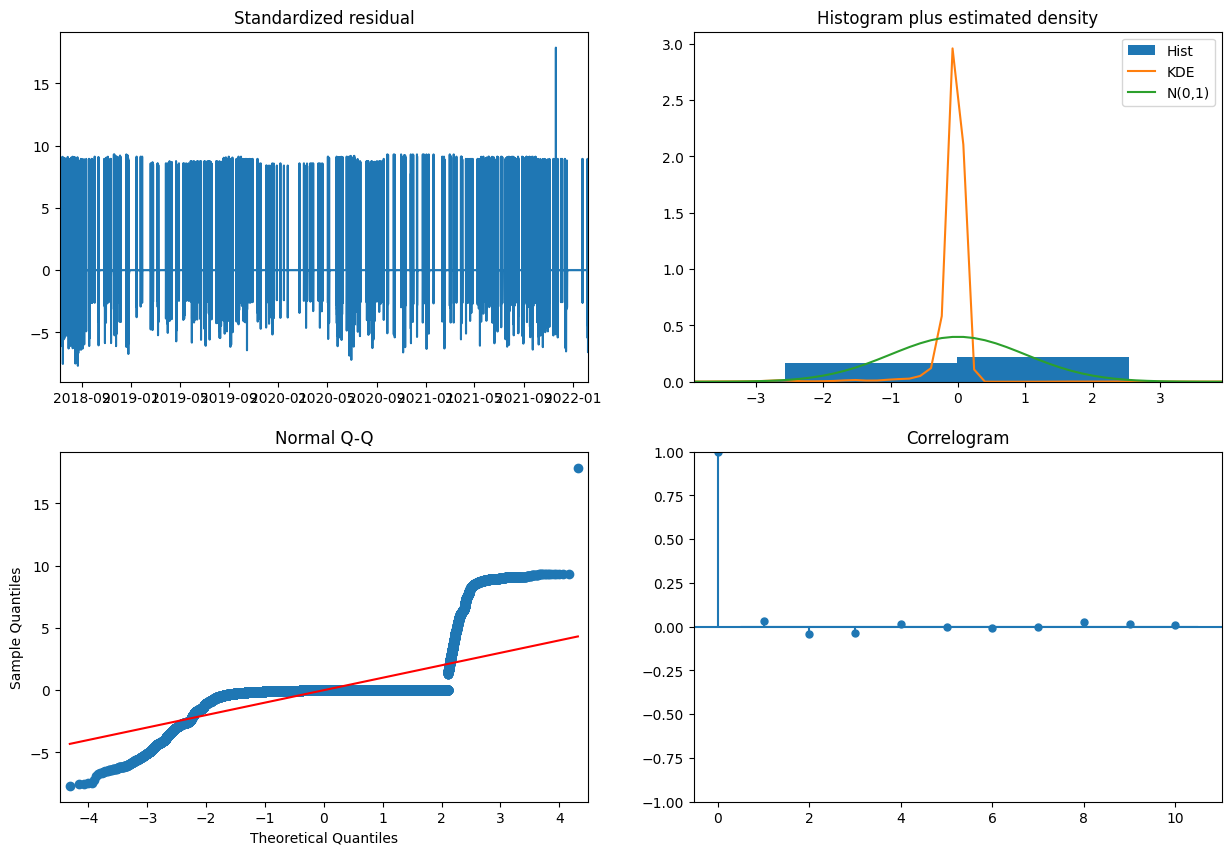

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               125846
Model:               SARIMAX(1, 1, 2)   Log Likelihood              184383.128
Date:                Tue, 25 Jun 2024   AIC                        -368758.255
Time:                        00:59:15   BIC                        -368719.284
Sample:                    07-07-2018   HQIC                       -368746.549
                         - 02-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8470      0.001    783.171      0.000       0.845       0.849
ma.L1         -1.5597      0.001  -1100.336      0.000      -1.562      -1.557
ma.L2          0.5642      0.001    414.677      0.0

In [15]:
from pmdarima import auto_arima

model_rain = auto_arima(train_data_rain, seasonal=False, trace=True)
model_fit_rain = model_rain.fit(train_data_rain)

model_fit_rain.plot_diagnostics(figsize=(15, 10))
plt.show()
print(model_fit_rain.summary())
print("AIC for Rain(mm):", model_fit_rain.aic())
print("BIC for Rain(mm):", model_fit_rain.bic())


In [16]:
model_rain_seasonal = auto_arima(train_data_rain, seasonal=True, m=12, trace=True)
model_fit_rain_seasonal = model_rain_seasonal.fit(train_data_rain)

print(model_fit_rain_seasonal.summary())
model_fit_rain_seasonal.plot_diagnostics(figsize=(15, 10))
plt.show()

print("AIC for Seasonal Rain(mm):", model_fit_rain_seasonal.aic())
print("BIC for Seasonal Rain(mm):", model_fit_rain_seasonal.bic())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-367466.577, Time=953.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-320201.466, Time=34.85 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-343428.132, Time=133.99 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-364012.365, Time=436.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-320203.466, Time=12.50 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-367477.733, Time=907.23 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-367474.496, Time=373.25 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-367512.507, Time=2282.50 sec


# Sarima Model


In [ ]:
model_rain_seasonal = auto_arima(train_data_rain, seasonal=True, m=12, trace=True)
model_fit_rain_seasonal = model_rain_seasonal.fit(train_data_rain)

print(model_fit_rain_seasonal.summary())
model_fit_rain_seasonal.plot_diagnostics(figsize=(15, 10))
plt.show()

print("AIC for Seasonal Rain(mm):", model_fit_rain_seasonal.aic())
print("BIC for Seasonal Rain(mm):", model_fit_rain_seasonal.bic())

NameError: name 'auto_arima' is not defined